## 02-05 정규 표현식(Regular Expression)

### 정규 표현식 문법과 모듈 함수

파이썬에서는 정규 표현식 모듈 re을 지원하므로, 이를 이용하면 특정 규칙이 있는 텍스트 데이터를 빠르게 정제할 수 있습니다. 

1. 정규 표현식 문법

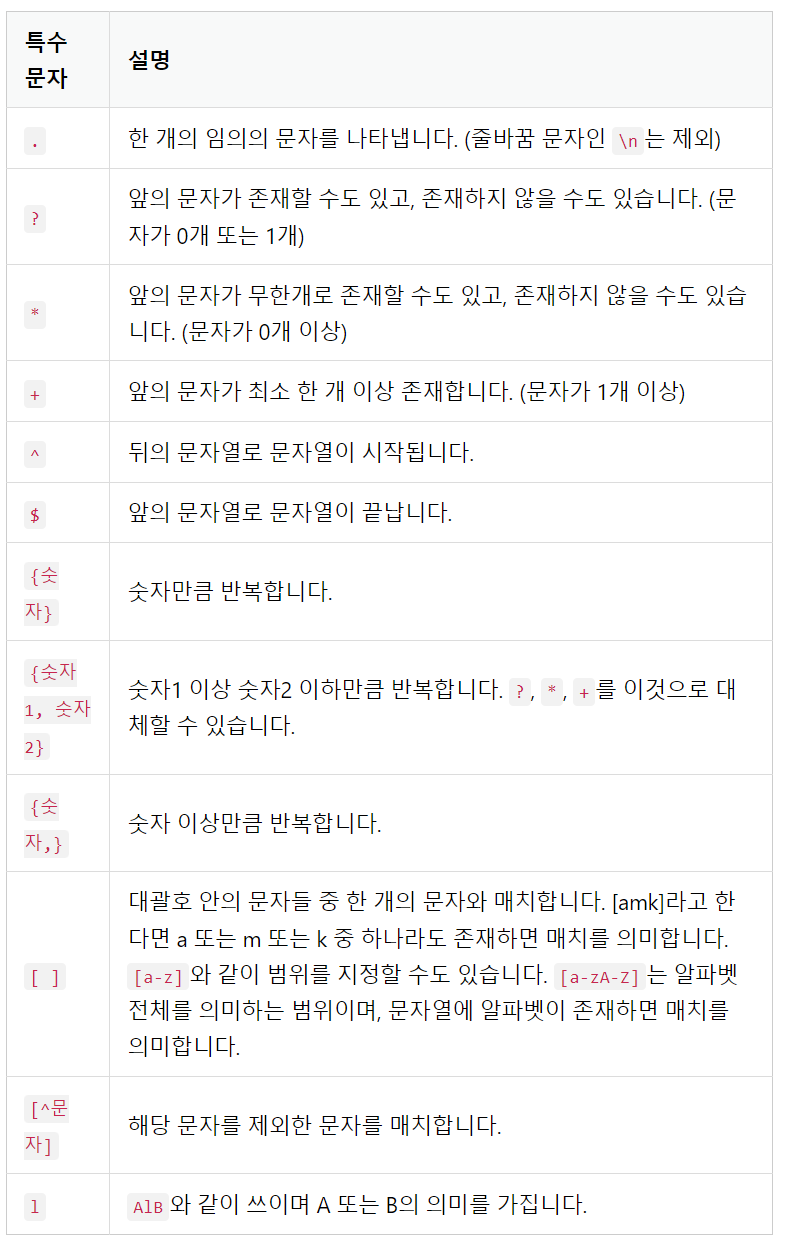

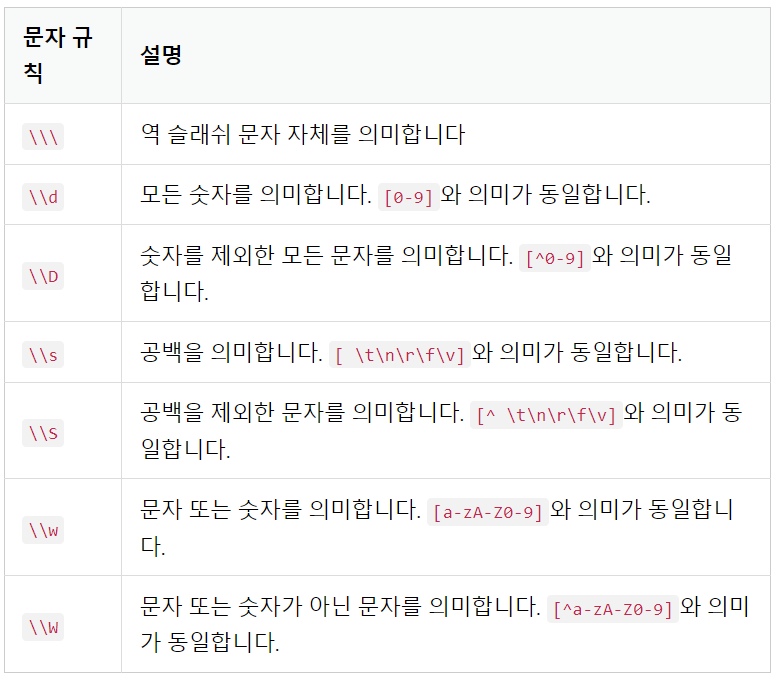

2. 정규표현식 모듈 함수

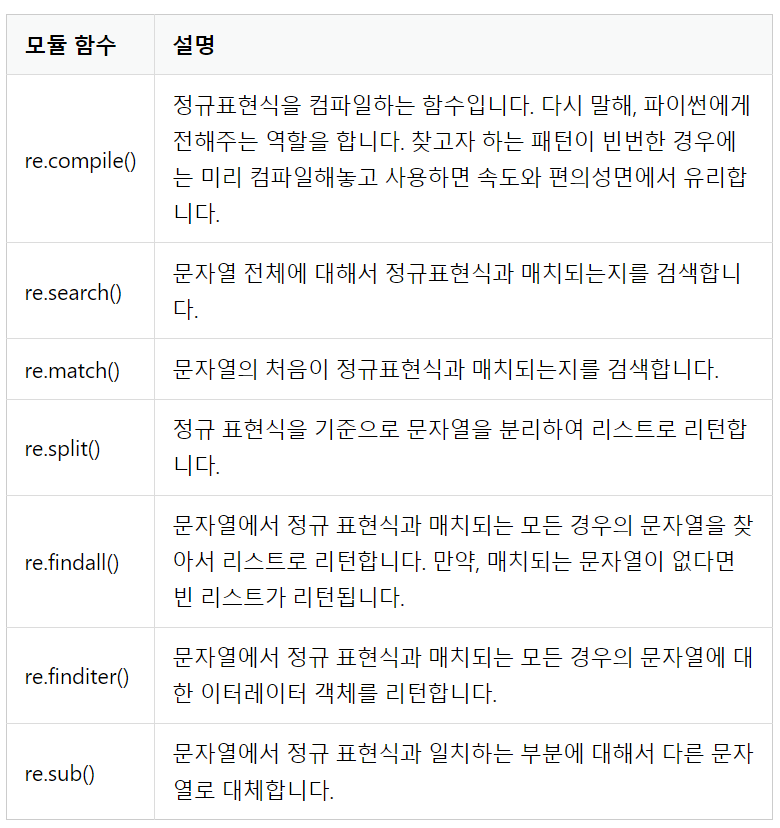

### 정규 표현식 실습

In [1]:
import re

.은 한 개의 임의의 문자를 나타냅니다.

In [2]:
r = re.compile("a.c")
r.search("kkk") # 아무런 결과도 출력되지 않는다.

In [3]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

?는 ?앞의 문자가 존재할 수도 있고 존재하지 않을 수도 있는 경우를 나타냅니다.

In [4]:
r = re.compile("ab?c")
r.search("abbc") # 아무런 결과도 출력되지 않는다.

In [5]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [6]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

*은 바로 앞의 문자가 0개 이상일 경우를 나타냅니다.

In [7]:
r = re.compile("ab*c")
r.search("a") # 아무런 결과도 출력되지 않는다.

In [8]:
r.search("abc") 

<re.Match object; span=(0, 3), match='abc'>

In [9]:
r.search("abbbbc") 

<re.Match object; span=(0, 6), match='abbbbc'>

+는 *와 유사합니다. 다른 점은 앞의 문자가 최소 1개 이상이어야 합니다.

In [10]:
r = re.compile("ab+c")
r.search("ac") # 아무런 결과도 출력되지 않는다.

In [11]:
r.search("abc") 

<re.Match object; span=(0, 3), match='abc'>

In [12]:
r.search("abbbbc") 

<re.Match object; span=(0, 6), match='abbbbc'>

^는 시작되는 문자열을 지정합니다. 

In [13]:
r = re.compile("^ab")

# 아무런 결과도 출력되지 않는다.
r.search("bbc")
r.search("zab")

In [14]:
r.search("abz")

<re.Match object; span=(0, 2), match='ab'>

문자에 {숫자}를 붙이면, 해당 문자를 숫자만큼 반복한 것을 나타냅니다.

In [15]:
r = re.compile("ab{2}c")

# 아무런 결과도 출력되지 않는다.
r.search("ac")
r.search("abc")
r.search("abbbbbc")

In [16]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

문자에 {숫자1, 숫자2}를 붙이면, 해당 문자를 숫자1 이상 숫자2 이하만큼 반복합니다.

In [18]:
r = re.compile("ab{2,8}c")

# 아무런 결과도 출력되지 않는다.
r.search("ac")
r.search("abc")
r.search("abbbbbbbbbc")

In [19]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [20]:
r.search("abbbbbbbbc")

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

문자에 {숫자,}를 붙이면 해당 문자를 숫자 이상 만큼 반복합니다. 

In [21]:
r = re.compile("a{2,}bc")

# 아무런 결과도 출력되지 않는다.
r.search("bc")
r.search("aa")

In [22]:
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [23]:
r.search("aaaaaaaabc")

<re.Match object; span=(0, 10), match='aaaaaaaabc'>

[ ]안에 문자들을 넣으면 그 문자들 중 한 개의 문자와 매치라는 의미를 가집니다.

In [24]:
r = re.compile("[abc]") # [abc]는 [a-c]와 같다.
r.search("zzz") # 아무런 결과도 출력되지 않는다.

In [25]:
r.search("a")

<re.Match object; span=(0, 1), match='a'>

In [26]:
r.search("aaaaaaa")           

<re.Match object; span=(0, 1), match='a'>

In [27]:
r.search("baac")      

<re.Match object; span=(0, 1), match='b'>

In [28]:
r = re.compile("[a-z]")

# 아무런 결과도 출력되지 않는다.
r.search("AAA")
r.search("111") 

In [29]:
r.search("aBC")

<re.Match object; span=(0, 1), match='a'>

[^문자]는 ^기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치하는 역할을 합니다. 

In [30]:
r = re.compile("[^abc]")

# 아무런 결과도 출력되지 않는다.
r.search("a")
r.search("ab") 
r.search("b")

In [31]:
r.search("d")

<re.Match object; span=(0, 1), match='d'>

In [32]:
r.search("1")                   

<re.Match object; span=(0, 1), match='1'>

### 정규 표현식 모듈 함수 예제

re.match() 와 re.search()의 차이  
search()가 정규 표현식 전체에 대해서 문자열이 매치하는지를 본다면, match()는 문자열의 첫 부분부터 정규 표현식과 매치하는지를 확인합니다. 문자열 중간에 찾을 패턴이 있더라도 match 함수는 문자열의 시작에서 패턴이 일치하지 않으면 찾지 않습니다.

In [33]:
r = re.compile("ab.")
r.match("kkkabc") # 아무런 결과도 출력되지 않는다.

In [34]:
r.search("kkkabc")  

<re.Match object; span=(3, 6), match='abc'>

In [35]:
r.match("abckkk")  

<re.Match object; span=(0, 3), match='abc'>

re.split()  
split() 함수는 입력된 정규 표현식을 기준으로 문자열들을 분리하여 리스트로 리턴합니다. 토큰화에 유용하게 쓰일 수 있습니다.

In [36]:
# 공백 기준 분리
text = "사과 딸기 수박 메론 바나나"
re.split(" ", text)

['사과', '딸기', '수박', '메론', '바나나']

In [37]:
# 줄바꿈 기준 분리
text = """사과
딸기
수박
메론
바나나"""

re.split("\n", text)

['사과', '딸기', '수박', '메론', '바나나']

In [38]:
# '+'를 기준으로 분리
text = "사과+딸기+수박+메론+바나나"

re.split("\+", text)

['사과', '딸기', '수박', '메론', '바나나']

re.findall()  
findall() 함수는 정규 표현식과 매치되는 모든 문자열들을 리스트로 리턴합니다. 단, 매치되는 문자열이 없다면 빈 리스트를 리턴합니다. 

In [40]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""

re.findall("\d+", text)

['010', '1234', '1234', '30']

In [41]:
re.findall("\d+", "문자열입니다.")

[]

re.sub()  
sub() 함수는 정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체할 수 있습니다.

In [42]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub('[^a-zA-Z]', ' ', text)
print(preprocessed_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


### 정규 표현식 텍스트 전처리 예제

In [43]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [47]:
re.split('\s+', text)

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [44]:
re.findall('\d+',text)  

['100', '101', '102']

In [46]:
re.findall('[A-Z]',text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [48]:
re.findall('[A-Z]{4}',text)  

['PROF', 'STUD', 'STUD']

In [49]:
re.findall('[A-Z][a-z]+',text)

['John', 'James', 'Mac']

### 정규 표현식을 이용한 토큰화

RegexpTokenizer()에서 괄호 안에 하나의 토큰으로 규정하기를 원하는 정규 표현식을 넣어서 토큰화를 수행합니다. 

In [50]:
from nltk.tokenize import RegexpTokenizer

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

tokenizer1 = RegexpTokenizer("[\w]+")
tokenizer2 = RegexpTokenizer("\s+", gaps=True)

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
